# 안녕하세요:)

## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [2]:
import pandas as pd

* 구별 버스 정류장 데이터 - df_seoul_bus_station
* 구별 유동인구 데이터 - df_seoul_moving
* 구별 상권 데이터 - df_seoul_business
* 구별 등록 인구 데이터 - df_seoul_people

df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [3]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_people= pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [4]:
df = pd.merge(df_seoul_bus_station, df_seoul_people, how = 'inner', on = '자치구')
df['승하차총승객수'] = df['승차총승객수'] + df['하차총승객수']
df = df.drop('승차총승객수', axis = 1)
df = df.drop('하차총승객수', axis = 1)
df['승하차평균승객수'] = df['승차평균승객수'] + df['하차평균승객수']
df = df.drop('승차평균승객수', axis = 1)
df = df.drop('하차평균승객수', axis = 1)
df =df.rename(columns = {'계' : '인구'})
df

,자치구,정류장수,노선수,세대,인구,남자,여자,세대당인구,65세이상고령자,승하차총승객수,승하차평균승객수
0,강남구,499,91,234612,537338,257096,280242,2.27,79575,15599696,250.139439
1,강동구,369,21,201926,465097,227891,237206,2.28,75477,5720559,196.279259
2,강북구,413,67,144725,300824,145934,154890,2.05,64961,9496964,261.811876
3,강서구,566,49,272572,578426,277797,300629,2.10,93924,9333911,175.707071
4,관악구,466,86,279353,500336,250450,249886,1.74,80686,15448295,312.269714
5,광진구,269,41,169483,353110,169525,183585,2.01,52604,5502859,236.875683
6,구로구,486,79,181916,419984,208027,211957,2.18,73864,9673189,233.375691
7,금천구,345,58,118697,244901,123959,120942,1.95,41819,7358588,239.849674
8,노원구,514,57,219065,514445,247417,267028,2.33,89426,8646019,175.721379
9,도봉구,359,46,138836,318100,154440,163660,2.28,65122,6515726,210.714896


In [5]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')

In [6]:
df = pd.merge(df, df_seoul_moving, how = 'inner', on = '자치구')
df

,자치구,정류장수,노선수,세대,인구,남자,여자,세대당인구,65세이상고령자,승하차총승객수,승하차평균승객수,이동 시간 합,이동 시간 평균,이동인구(합),이동인구(평균)
0,강남구,499,91,234612,537338,257096,280242,2.27,79575,15599696,250.139439,11839100,22.815984,46099651.40,88.841965
1,강동구,369,21,201926,465097,227891,237206,2.28,75477,5720559,196.279259,8308840,25.035525,21942808.89,66.116297
2,강북구,413,67,144725,300824,145934,154890,2.05,64961,9496964,261.811876,7600530,23.298572,13026907.71,39.932524
3,강서구,566,49,272572,578426,277797,300629,2.10,93924,9333911,175.707071,9468870,24.646513,22716590.72,59.128994
4,관악구,466,86,279353,500336,250450,249886,1.74,80686,15448295,312.269714,8866100,22.938270,19645164.80,50.825739
5,광진구,269,41,169483,353110,169525,183585,2.01,52604,5502859,236.875683,8671330,22.020915,18663040.44,47.394948
6,구로구,486,79,181916,419984,208027,211957,2.18,73864,9673189,233.375691,7955490,22.541971,14961558.32,42.393746
7,금천구,345,58,118697,244901,123959,120942,1.95,41819,7358588,239.849674,6080070,23.078386,8405718.47,31.905951
8,노원구,514,57,219065,514445,247417,267028,2.33,89426,8646019,175.721379,9033430,23.620948,21317478.36,55.741733
9,도봉구,359,46,138836,318100,154440,163660,2.28,65122,6515726,210.714896,6911530,23.951214,11195633.02,38.797343


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다

? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다

In [9]:
from scipy.stats import kruskal
import scipy.stats as stats
from scipy import stats

In [10]:
a = df[['자치구', '인구', '정류장수']]
a.head()

,자치구,인구,정류장수
0,강남구,537338,499
1,강동구,465097,369
2,강북구,300824,413
3,강서구,578426,566
4,관악구,500336,466


In [7]:
b = df[['자치구', '승하차총승객수', '노선수']]
b.head()

,자치구,승하차총승객수,노선수
0,강남구,15599696,91
1,강동구,5720559,21
2,강북구,9496964,67
3,강서구,9333911,49
4,관악구,15448295,86


In [8]:
b['노선수/총승하차승객수'] = b['노선수'] / b['승하차총승객수']
b

C:\Users\minje\AppData\Local\Temp\ipykernel_9320\1267131228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['노선수/총승하차승객수'] = b['노선수'] / b['승하차총승객수']


,자치구,승하차총승객수,노선수,노선수/총승하차승객수
0,강남구,15599696,91,0.000006
1,강동구,5720559,21,0.000004
2,강북구,9496964,67,0.000007
3,강서구,9333911,49,0.000005
4,관악구,15448295,86,0.000006
5,광진구,5502859,41,0.000007
6,구로구,9673189,79,0.000008
7,금천구,7358588,58,0.000008
8,노원구,8646019,57,0.000007
9,도봉구,6515726,46,0.000007


In [9]:
b.sort_values('노선수/총승하차승객수', ascending = True)

,자치구,승하차총승객수,노선수,노선수/총승하차승객수
1,강동구,5720559,21,0.000004
17,송파구,11245230,55,0.000005
3,강서구,9333911,49,0.000005
4,관악구,15448295,86,0.000006
0,강남구,15599696,91,0.000006
24,중랑구,7533464,48,0.000006
14,서초구,14199280,93,0.000007
8,노원구,8646019,57,0.000007
21,은평구,10324159,71,0.000007
10,동대문구,10355944,73,0.000007


* 가설 
# 인구가 많을수록 버스 정류장 수가 많을 것이다 


* N < 30 이므로
### 우선, 정규성 검정 (Shapiro test)

대립가설(H1) : 데이터가 정규분포를 따르지 않는다.

귀무가설(H0) : 데이터가 정규분포를 따른다.

In [21]:
stats.shapiro(a['정류장수'])

ShapiroResult(statistic=0.9804373383522034, pvalue=0.8936382532119751)

In [22]:
stats.shapiro(a['인구'])

ShapiroResult(statistic=0.9902743697166443, pvalue=0.9962607026100159)

p-value값이 0.05 이상이므로, 귀무가설 채택, 정규분포를 따른다

#### 정규성을 띄므로, pearson's 상관계수를 이용하여 변수간 상관관계 분석

In [16]:
import scipy.stats as spst
spst.pearsonr(a['인구'],a['정류장수'])

(0.5666148323603176, 0.0031462922429467965)

### => p-value값 < 0.05 이므로, 의미가 있는 값, 0.5666의 양의 상관관계를 가진다 

### * 산점도로 나타내보자

In [11]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

In [12]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

#한글 폰트 깨짐 현상으로 인해 추가해 주었습니다.

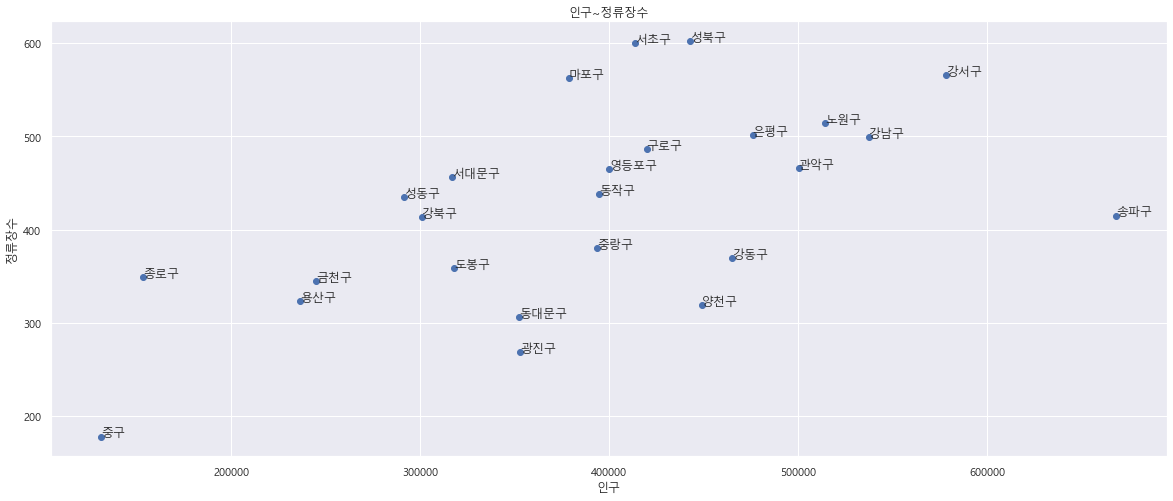

In [13]:
fig=plt.figure(figsize=(20,8))
plt.scatter(a['인구'],a['정류장수'])
plt.title("인구~정류장수")
plt.xlabel("인구")
plt.ylabel("정류장수")

for i in range(len(a)): # 행 개수만큼 순회
    row = a.iloc[i] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['인구'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

양의 상관계수 0.56666 정도를 가짐을 확인할 수 ㅇ

인구는 제일 많은데, 정류장수는 400 언저리인, 혼자 오른쪽에 떨어져있는 점(제일 불쌍) : 송파구임을 알 수 ㅇ

In [15]:
from statsmodels.formula.api import ols
res = ols('정류장수 ~ 인구', data=a).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   정류장수   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     10.88
Date:                Wed, 02 Nov 2022   Prob (F-statistic):            0.00315
Time:                        20:39:25   Log-Likelihood:                -146.77
No. Observations:                  25   AIC:                             297.5
Df Residuals:                      23   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    238.6650     59.151      4.035      0.001     116.302     361.028
인구             0.0005      0.000      3.298      0.003       0.000       0.001
==============================================================================
Omnibus:                        0.182   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.393
Skew:                          -0.009   Prob(JB):                        0.822
Kurtosis:                       2.386   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 설명력 : 0.321로 낮다 (X는 Y를 32.1% 설명할 수 있다)
### P-value < 0.05이므로, 회귀식에 의해 Y의 변동부분이 통계적으로 유의하게 설명됨

## 정류장 = 238.665 + 인구 * 0.0005, 회귀식 도출

C:\Users\minje\AppData\Local\Temp\ipykernel_10672\336263950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theory['회귀예측 정류장수']=238.665+0.0005*theory['인구']
C:\Users\minje\AppData\Local\Temp\ipykernel_10672\336263950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theory['예측차이']=theory['회귀예측 정류장수']-theory['정류장수']


<BarContainer object of 25 artists>

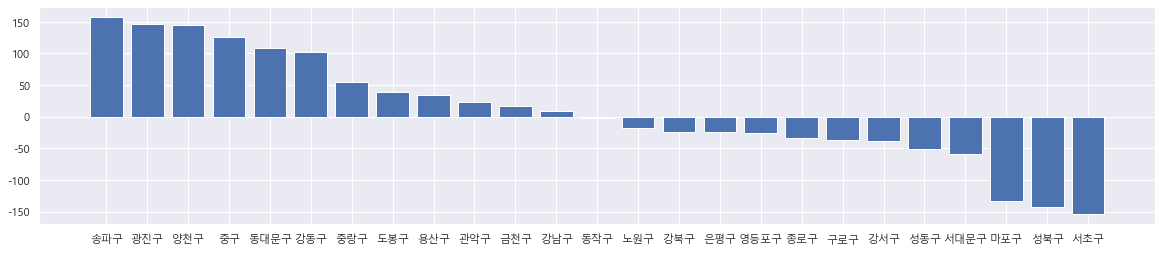

In [17]:
theory=a[['자치구','정류장수','인구']]
theory['회귀예측 정류장수']=238.665+0.0005*theory['인구']
theory['예측차이']=theory['회귀예측 정류장수']-theory['정류장수']
plt.figure(figsize=(20,4))
plt.bar('자치구','예측차이',data=theory.sort_values('예측차이',ascending=False))

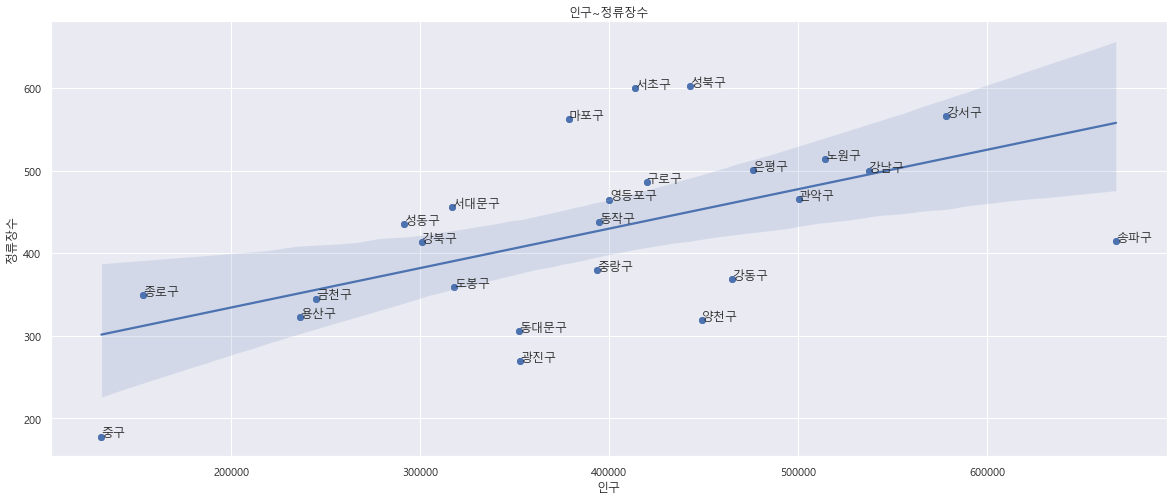

In [18]:
fig=plt.figure(figsize=(20,8))
plt.scatter(a['인구'],a['정류장수'])
plt.title("인구~정류장수")
plt.xlabel("인구")
plt.ylabel("정류장수")
sns.regplot(x='인구',y='정류장수',data=theory)

for i in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[i] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['인구'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

### 변수간의 상관관계 이번엔 Pointplot으로 확인

In [12]:
a['인구/1000'] = a['인구'] / 1000
a

C:\Users\minje\AppData\Local\Temp\ipykernel_26008\3555295438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['인구/1000'] = a['인구'] / 1000


,자치구,인구,정류장수,노선수,인구/1000
0,강남구,537338,499,91,537.338
1,강동구,465097,369,21,465.097
2,강북구,300824,413,67,300.824
3,강서구,578426,566,49,578.426
4,관악구,500336,466,86,500.336
5,광진구,353110,269,41,353.110
6,구로구,419984,486,79,419.984
7,금천구,244901,345,58,244.901
8,노원구,514445,514,57,514.445
9,도봉구,318100,359,46,318.100


<AxesSubplot:xlabel='자치구', ylabel='정류장수'>

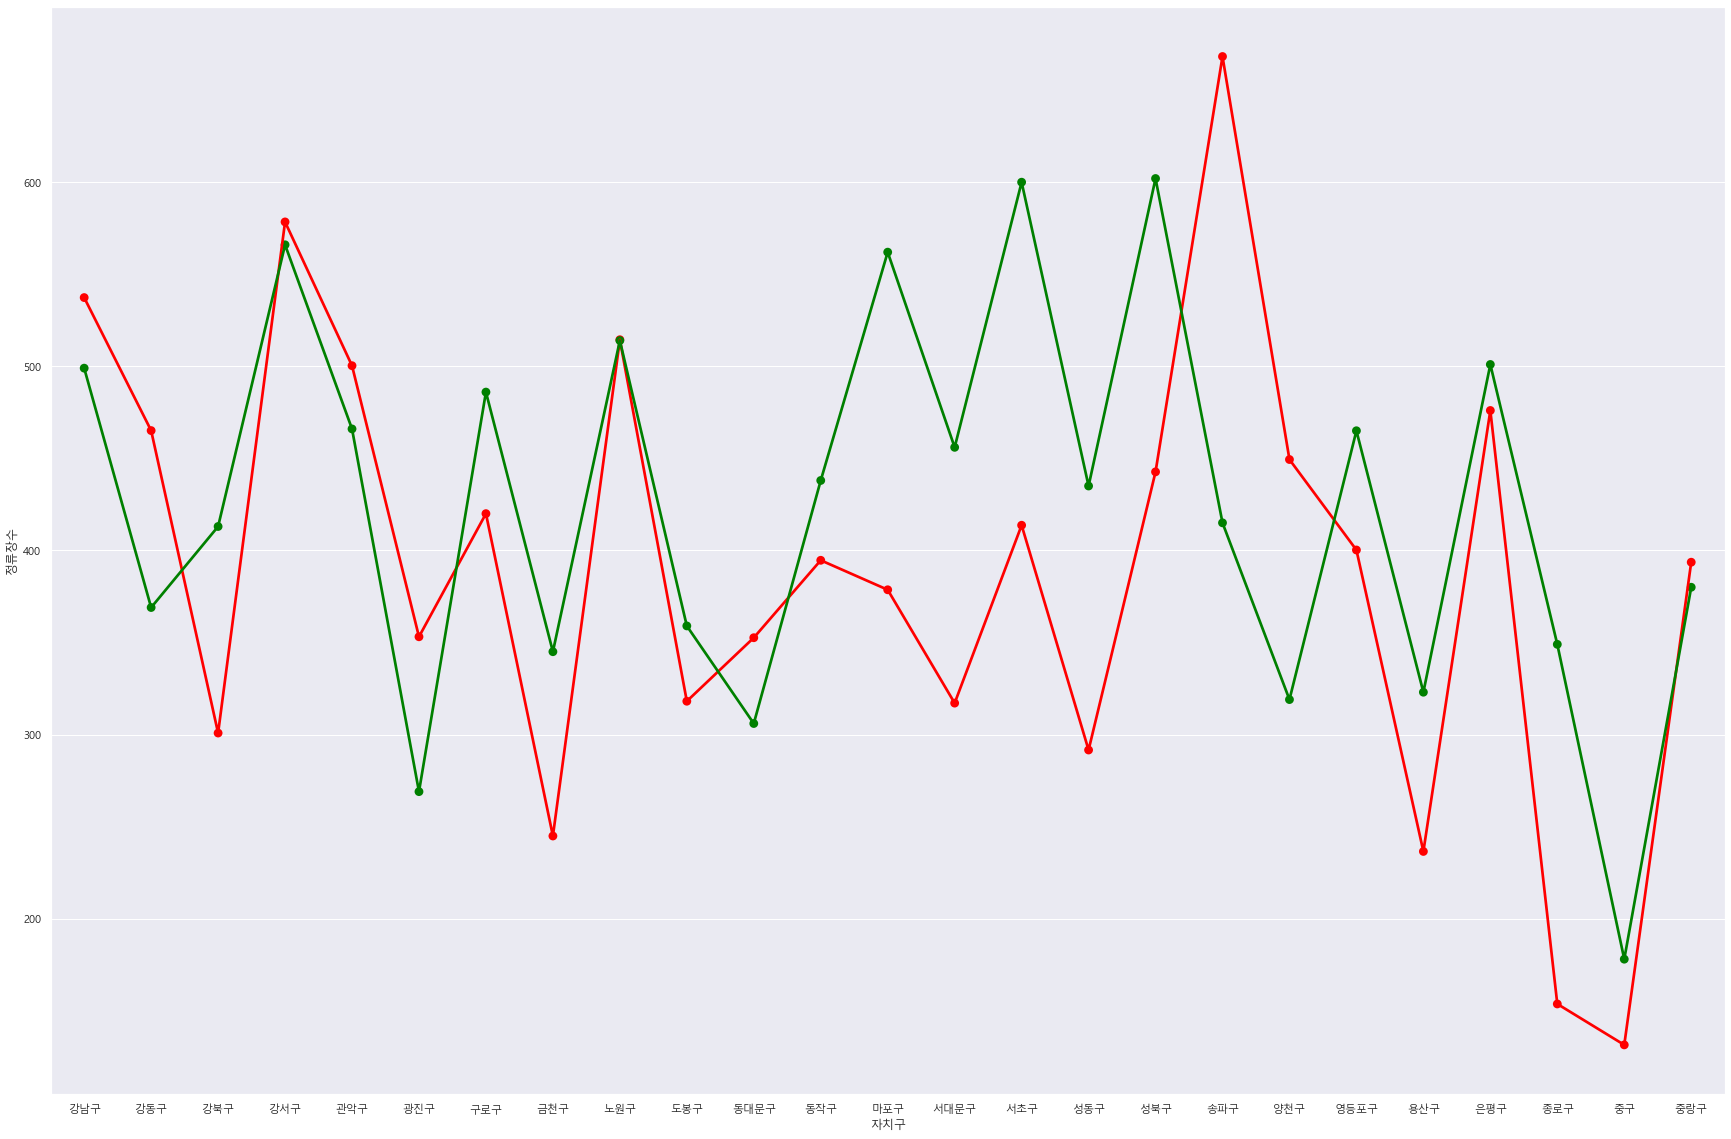

In [45]:
plt.figure(figsize = (30,20))

sns.pointplot(data = a, x = '자치구', y = '인구/1000', color = 'red')
sns.pointplot(data = a, x = '자치구', y = '정류장수', color = 'green')

### => 인구와 정류장 수는 0.5666 (양의 상관관계)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

In [49]:
a = a.drop('인구/10000', axis = 1)
a = a.drop('인구/1000', axis = 1)
a

,자치구,인구,정류장수,노선수
0,강남구,537338,499,91
1,강동구,465097,369,21
2,강북구,300824,413,67
3,강서구,578426,566,49
4,관악구,500336,466,86
5,광진구,353110,269,41
6,구로구,419984,486,79
7,금천구,244901,345,58
8,노원구,514445,514,57
9,도봉구,318100,359,46


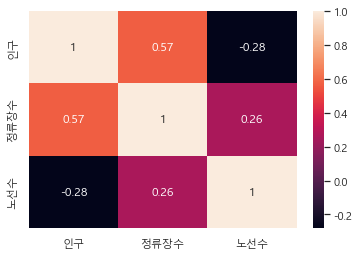

In [50]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(a.corr(), annot = True)
plt.show()

* 위 차트를 통해 알게된 사실을 정리해봅시다.
### 인구와 정류장수 : 0.56666의 양의 상관관계

## 4.관계 정리

## 변수 (column)사이의 상관계수(correlation)
### -> corr함수를 통해 상관계수 연산(-1, 1 사이의 결과)
* 1에 가까울수록 양의 상관관계가 강하다 (= 하나가 증가하면 다른 하나도 증가)
* -1에 가까울수록 음의 상관관계가 강하다 (= 하나가 증가하면 다른 하나는 감소)

In [16]:
a.corr()

,인구,정류장수,노선수
인구,1.000000,0.566615,-0.281536
정류장수,0.566615,1.000000,0.258798
노선수,-0.281536,0.258798,1.000000


### => 역시, 인구와 정류장 수의 상관관계 : 0.5666 정도

In [63]:
df = df.astype({"인구":'int'})
df = df.astype({"세대":'int'})
df = df.astype({"세대당인구":'float'})
df = df.astype({"65세이상고령자":'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       25 non-null     object 
 1   정류장수      25 non-null     int64  
 2   노선수       25 non-null     int64  
 3   승차평균승객수   25 non-null     float64
 4   하차평균승객수   25 non-null     float64
 5   세대        25 non-null     int32  
 6   인구        25 non-null     int32  
 7   남자        25 non-null     int64  
 8   여자        25 non-null     int64  
 9   세대당인구     25 non-null     float64
 10  65세이상고령자  25 non-null     int32  
 11  승하차총승객수   25 non-null     int64  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 2.2+ KB


In [64]:
corr = df.corr()

In [14]:
a['정류장수/인구'] = a['정류장수'] / a['인구']
a

C:\Users\minje\AppData\Local\Temp\ipykernel_26008\1857178618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['정류장수/인구'] = a['정류장수'] / a['인구']


,자치구,인구,정류장수,노선수,인구/1000,정류장수/인구
0,강남구,537338,499,91,537.338,0.000929
1,강동구,465097,369,21,465.097,0.000793
2,강북구,300824,413,67,300.824,0.001373
3,강서구,578426,566,49,578.426,0.000979
4,관악구,500336,466,86,500.336,0.000931
5,광진구,353110,269,41,353.110,0.000762
6,구로구,419984,486,79,419.984,0.001157
7,금천구,244901,345,58,244.901,0.001409
8,노원구,514445,514,57,514.445,0.000999
9,도봉구,318100,359,46,318.100,0.001129


## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

## * 인구대비 정류장수 비교

### 1. 인구대비 정류장수가 가장 적었던 자치구는 어디일까?

In [15]:
a.sort_values('정류장수/인구', ascending = True)

,자치구,인구,정류장수,노선수,인구/1000,정류장수/인구
17,송파구,668261,415,55,668.261,0.000621
18,양천구,449378,319,56,449.378,0.000710
5,광진구,353110,269,41,353.110,0.000762
1,강동구,465097,369,21,465.097,0.000793
10,동대문구,352592,306,73,352.592,0.000868
0,강남구,537338,499,91,537.338,0.000929
4,관악구,500336,466,86,500.336,0.000931
24,중랑구,393600,380,48,393.600,0.000965
3,강서구,578426,566,49,578.426,0.000979
8,노원구,514445,514,57,514.445,0.000999


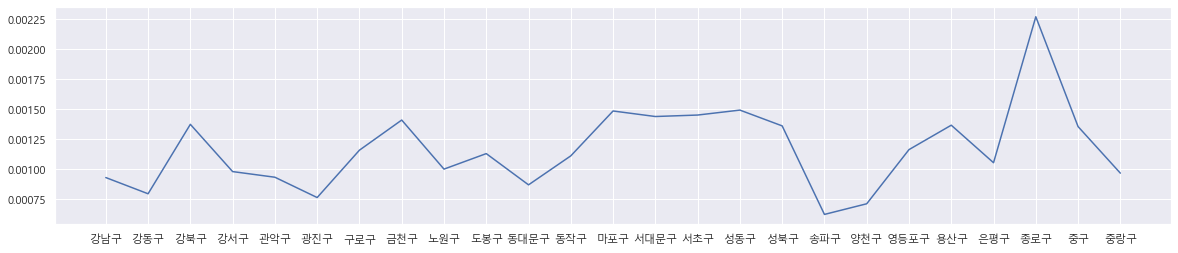

In [20]:
plt.figure(figsize=(20,4))
plt.plot('자치구', '정류장수/인구', data = a)

### => 인구대비 정류장수가 가장 적었던 자치구 : 송파, 양천, 광진, 강동, 동대문